In [1]:
#essential library
import numpy as np
import pandas as pd 

# for eda & visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
sns.set(style='white', context='notebook', palette='deep')

#algoritms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
#evaluation

from sklearn.metrics import accuracy_score




import warnings
warnings.filterwarnings('ignore')


# import data

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
PAS = list(test_df.PassengerId)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

# EDA

In [7]:
report = ProfileReport(test_df)
report

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

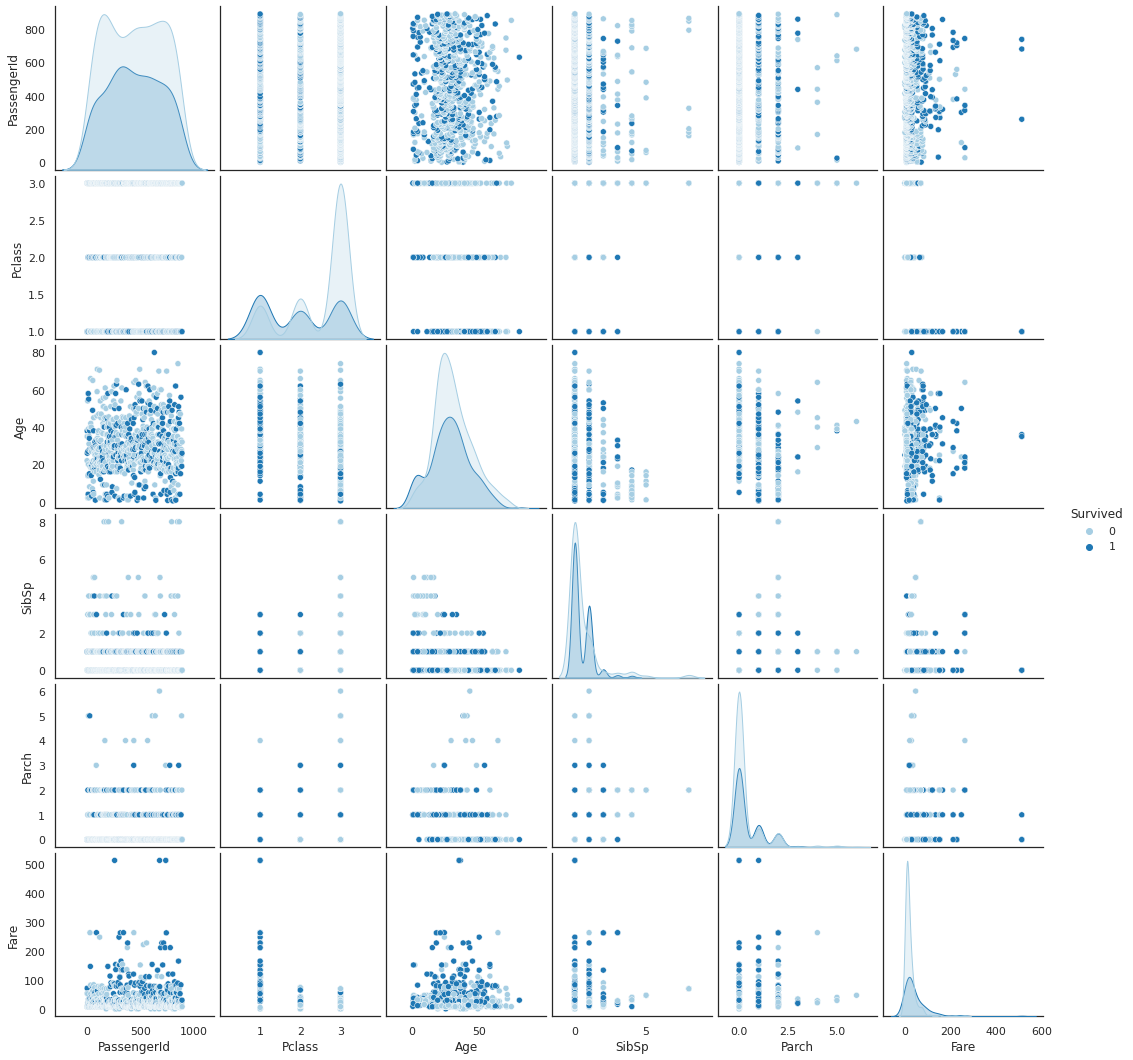

In [8]:
sns.pairplot(train_df,hue='Survived',palette='Paired');

<AxesSubplot:>

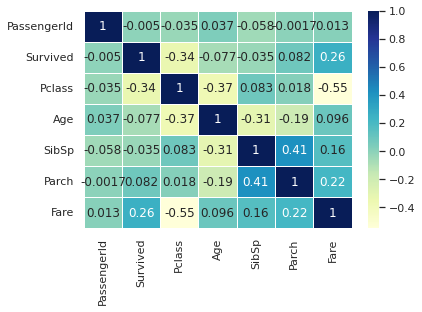

In [9]:
sns.heatmap(train_df.corr(),annot=True, cmap="YlGnBu", linewidths=1)

<AxesSubplot:xlabel='Sex', ylabel='count'>

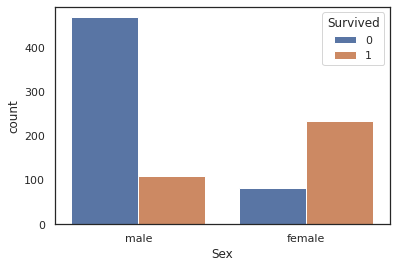

In [10]:
# some information about SEX
sns.countplot(x = train_df['Sex'],hue=train_df['Survived'])

In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Parch', ylabel='count'>

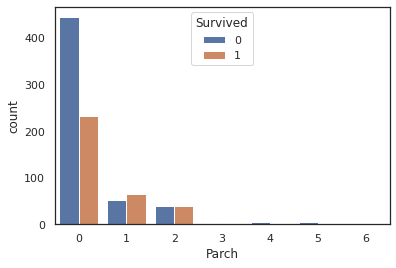

In [12]:
sns.countplot(x= train_df['Parch'],hue=train_df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

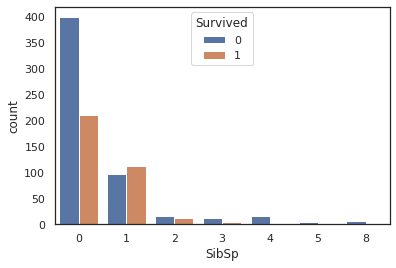

In [13]:
sns.countplot(x= train_df['SibSp'],hue=train_df['Survived'])

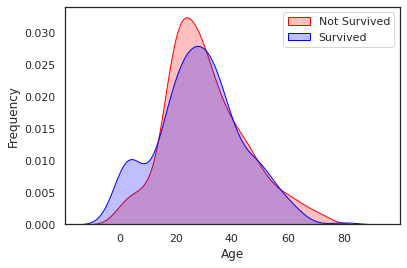

In [14]:
# Explore Age distibution 
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [15]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Survived', ylabel='count'>

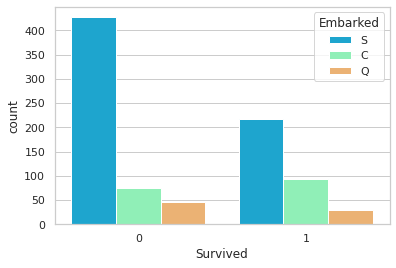

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='rainbow')

# Preparing Data to Create Model

In [17]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')
test_df['Cabin'] = test_df['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')

In [18]:
print(train_df['Cabin'].value_counts(),"\n--------\n",test_df['Cabin'].value_counts())

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64 
--------
 Z    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64


In [19]:
train_df.loc[339, 'Cabin'] = 'A'
train_df['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [20]:
train_df[train_df['Cabin']=='T'].index.values

array([], dtype=int64)

In [21]:
train_df['Cabin'] = train_df['Cabin'].replace(['A', 'B', 'C'], 'ABC')
train_df['Cabin'] = train_df['Cabin'].replace(['D', 'E'], 'DE')
train_df['Cabin'] = train_df['Cabin'].replace(['F', 'G'], 'FG')

test_df['Cabin'] = test_df['Cabin'].replace(['A', 'B', 'C'], 'ABC')
test_df['Cabin'] = test_df['Cabin'].replace(['D', 'E'], 'DE')
test_df['Cabin'] = test_df['Cabin'].replace(['F', 'G'], 'FG')
train_df["Cabin"].unique()


array(['Z', 'ABC', 'DE', 'FG'], dtype=object)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S


In [23]:
train_df.drop(["Ticket", "Name", "PassengerId"], axis=1, inplace=True)
test_df.drop(["Ticket", "Name",'PassengerId'], axis=1, inplace=True)

train_df["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)


test_df["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace=True)

train_df["Embarked"].fillna('S', inplace=True) #mode
test_df["Embarked"].fillna('S', inplace=True)

In [24]:
train_df.groupby("Embarked").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.178095,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.032468,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.307663,0.569659,0.411765,27.243651


In [25]:
train_df.groupby("Cabin").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,
ABC,0.631148,1.000000,35.741148,0.467213,0.467213,97.324248
DE,0.753846,1.215385,37.930769,0.369231,0.307692,51.721926
FG,0.588235,2.529412,19.676471,0.529412,0.705882,17.493135
Z,0.299854,2.639010,27.657569,0.547307,0.365357,19.157325


In [26]:
gender = {'male': 0, 'female': 1}
train_df.Sex = [gender[item] for item in train_df.Sex] 
test_df.Sex = [gender[item] for item in test_df.Sex] 

embarked = {'S': 0, 'Q':1, 'C': 2}
train_df.Embarked = [embarked[item] for item in train_df.Embarked] 
test_df.Embarked = [embarked[item] for item in test_df.Embarked] 

Cabins = {'Z': 0, 'FG':1, "ABC":2, 'DE': 3}
train_df.Cabin = [Cabins[item] for item in train_df.Cabin] 
test_df.Cabin = [Cabins[item] for item in test_df.Cabin] 

<AxesSubplot:>

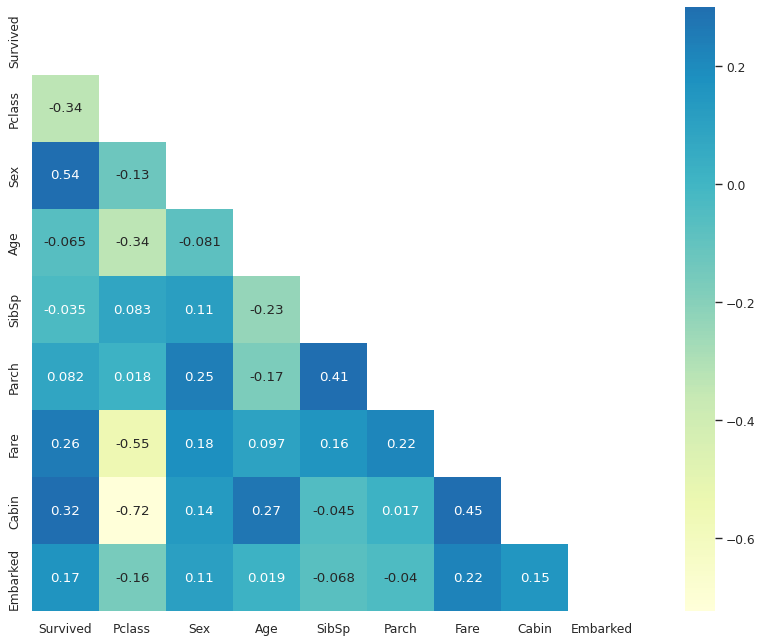

In [27]:
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(16,10),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(train_df.corr(), mask=mask, cmap="YlGnBu", vmax=.3, center=0,annot = True,
            square=True)


In [28]:
expected_values = train_df["Survived"]
train_df.drop("Survived", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)



# Scaling Data with Minmax scaler

In [29]:
minmax = MinMaxScaler()
minmax.fit(train_df)
train_data = minmax.transform(train_df)
test_data = minmax.transform(test_df)

In [30]:
X = train_df
y = expected_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create model

In [31]:
model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1500,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

In [32]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.8679775280898876
Testing accuracy:  0.8435754189944135


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred_train = gbk.predict(X_train)
y_pred_test = gbk.predict(X_test)

In [34]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.901685393258427
Testing accuracy:  0.8324022346368715


In [35]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [36]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.9817415730337079
Testing accuracy:  0.8156424581005587


In [37]:
output = pd.DataFrame()
output["PassengerId"] = PAS
output["Survived"] = gbk.predict(test_df)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [38]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
